# Working with Excel

INFO 5871-0014

_Keke Wu_

### Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

## Question 1: Extract data from Excel and create a CSV file

We are working with the Colorado Health Statistics Regional data from 2017. We will extract a data with six variables for each region:

- Percent of population with some degree of college education
- Unemployment rate
- % of residents in "fair or poor" health
- % of residents who visited a doctor in the last 12 months
- % of smokers 

There are 21 regions, so there will be 21 rows.

To build your data, you can use the following function:


In [2]:
def get_entry(wb, sheetname, row, col):
    """
    Returns the content of a spreadsheet element.
    
    Arguments:
    wb -- Excel workbook object from openpyxl
    sheetname -- The name of the sheet to extract from
    row, col -- The row and column where the data is to be extracted
    """
    sheet = wb[sheetname]
    cell = f'{col}{row}'
    return sheet[cell].value

### Load the data

Need to open "data only" because we want calculated values not formulas.

In [3]:
wb = openpyxl.load_workbook('hsr-workbook-2017.xlsx', data_only=True)

### Define the names of the sheets for each region

In [4]:
region_sheets = [f'HSR {i}' for i in range(1,22)]
region_sheets

['HSR 1',
 'HSR 2',
 'HSR 3',
 'HSR 4',
 'HSR 5',
 'HSR 6',
 'HSR 7',
 'HSR 8',
 'HSR 9',
 'HSR 10',
 'HSR 11',
 'HSR 12',
 'HSR 13',
 'HSR 14',
 'HSR 15',
 'HSR 16',
 'HSR 17',
 'HSR 18',
 'HSR 19',
 'HSR 20',
 'HSR 21']

## Question 1: Set up the data and examine

Create Series for each value


### Unemployment rate

Cell: C27

In [5]:
unem_lst = [get_entry(wb, sheet, 27, 'C') for sheet in region_sheets]
unem = pd.Series(unem_lst)
unem.head()

0    0.023570
1    0.023138
2    0.022731
3    0.031726
4    0.020836
dtype: float64

### College education

There are three cells: "Some college" (C43), "College graduate" (C44), "Postgraduate" (C45). We will add these together to create the column. Use a `for` loop, it will be easier than trying to do everything in a list comprehension.

In [6]:
somcol = [get_entry(wb, sheet, 43, 'C') for sheet in region_sheets]
colgrad = [get_entry(wb, sheet, 44, 'C') for sheet in region_sheets]
postgrad = [get_entry(wb, sheet, 45, 'C') for sheet in region_sheets]
coll_lst = []
for i in range(0, len(somcol)):
    coll_lst.append(somcol[i] + colgrad[i] + postgrad[i])
coll = pd.Series(coll_lst)
coll.head()

0    0.459277
1    0.692341
2    0.794693
3    0.651583
4    0.625867
dtype: float64

### Low health

% of residents report "fair" or "poor" health. 

Cell: I18

In [7]:
lowh_lst = [get_entry(wb, sheet, 18, 'I')for sheet in region_sheets]
lowh = pd.Series(lowh_lst)
lowh.head()

0    0.221251
1    0.137232
2    0.073805
3    0.137196
4    0.125222
dtype: float64

### Doctor


% of residents who visited a doctor in the last 12 months

Cell: I9


In [8]:
doct_lst  = [get_entry(wb, sheet, 9, 'I')for sheet in region_sheets]
doct = pd.Series(doct_lst)
doct.head()

0    0.246145
1    0.252471
2    0.148866
3    0.233632
4    0.187236
dtype: float64

### Smokers

% of residents who are smokers.

Cell: I61

In [9]:
smok_lst = [get_entry(wb, sheet, 61, 'I')for sheet in region_sheets]
smok = pd.Series(smok_lst)
smok.head()

0    0.187167
1    0.129507
2    0.084919
3    0.196453
4    0.124721
dtype: float64

### Create data frame

Include `Region` as a column and then set index to `Region`.

In [10]:
df_dict = {}

region_col = []

for region in region_sheets:
    region_col.append(region)

df_dict['Region'] = region_col
df_dict['College Education'] = coll
df_dict['Unemployment'] = unem
df_dict['Low Health'] = lowh
df_dict['Doctor'] = doct
df_dict['Smoker'] = smok

regional_df = pd.DataFrame(df_dict)
df_health = regional_df.set_index('Region')
df_health

,College Education,Unemployment,Low Health,Doctor,Smoker
Region,,,,,
HSR 1,0.459277,0.023570,0.221251,0.246145,0.187167
HSR 2,0.692341,0.023138,0.137232,0.252471,0.129507
HSR 3,0.794693,0.022731,0.073805,0.148866,0.084919
HSR 4,0.651583,0.031726,0.137196,0.233632,0.196453
HSR 5,0.625867,0.020836,0.125222,0.187236,0.124721
HSR 6,0.484784,0.033781,0.181648,0.292609,0.188173
HSR 7,0.501564,0.042891,0.228348,0.257856,0.170443
HSR 8,0.492404,0.038061,0.260885,0.283036,0.199916
HSR 9,0.613151,0.028425,0.118986,0.339075,0.160791


In [11]:
print(df_health.shape)
df_health.head()

(21, 5)


,College Education,Unemployment,Low Health,Doctor,Smoker
Region,,,,,
HSR 1,0.459277,0.023570,0.221251,0.246145,0.187167
HSR 2,0.692341,0.023138,0.137232,0.252471,0.129507
HSR 3,0.794693,0.022731,0.073805,0.148866,0.084919
HSR 4,0.651583,0.031726,0.137196,0.233632,0.196453
HSR 5,0.625867,0.020836,0.125222,0.187236,0.124721


### Save as CSV

Use `to_csv` with the filename "health_data_2017.csv"

In [12]:
df_health.to_csv('health_data_2017.csv')

### Do a pair plot


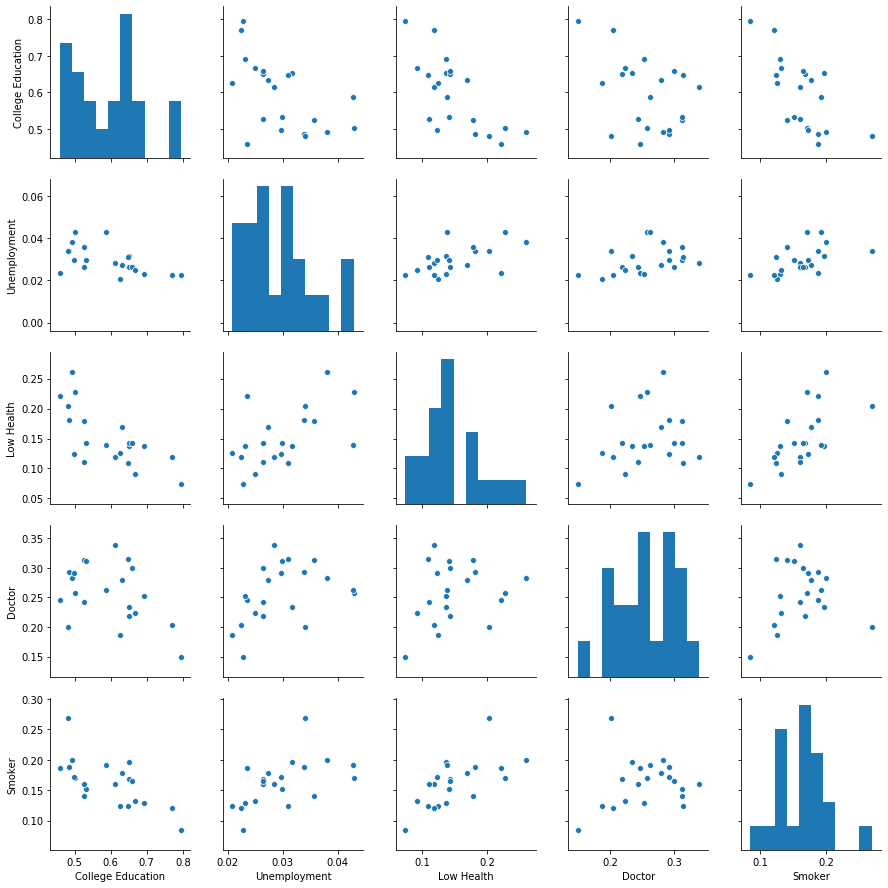

In [13]:
sns.pairplot(df_health.dropna());

## Question 2: Look at larger regions

Load the table with the region names. These are 8 geographical groups for different areas of the state. As above, set the index to the `Region` so that the two data frames are organized the same way.

In [14]:
df = pd.read_csv("region_names.csv")
df_region = df.set_index('Region')
df_region

,Name
Region,
HSR 11,NW
HSR 12,NW
HSR 19,WC
HSR 10,WC
HSR 9,SW
HSR 8,SW
HSR 17,Metro
HSR 21,Metro
HSR 3,Metro


### Join the data

Use `concat` with `axis=1'`. This will create a new column where each HSR region is labeled by the state region. You will also need to provide the argument `sort=True` because the index in the region names data frame is not in the same order as in the health data.

You will need to reset the name of the index to `Region` using the `.index.name` property because this information is lost in the `concat` operation.

In [15]:
df_concat = pd.concat([df_region, df_health], axis=1, sort=True)
df_concat.index.name = 'Region'
df_concat

,Name,College Education,Unemployment,Low Health,Doctor,Smoker
Region,,,,,,
HSR 1,NE,0.459277,0.023570,0.221251,0.246145,0.187167
HSR 10,WC,0.525043,0.035605,0.178830,0.312423,0.139821
HSR 11,NW,0.531692,0.029832,0.141764,0.312068,0.151742
HSR 12,NW,0.648257,0.030895,0.108855,0.314447,0.123981
HSR 13,Pikes,0.480696,0.034043,0.203917,0.200281,0.268968
HSR 14,NE,0.497725,0.029687,0.123781,0.291500,0.172400
HSR 15,NE,0.650591,0.026366,0.142847,0.218486,0.168238
HSR 16,Metro,0.771410,0.022436,0.119117,0.203675,0.121439
HSR 17,Metro,0.632398,0.027333,0.169948,0.279412,0.177530


### Melt

Use `melt` to get a narrow data set. It should have four columns: Region, Name, variable and value. You will need to use `reset_index()` to make `Region` back into a column so you can do this.

In [16]:
df_melt = df_concat.reset_index()
df_melted = pd.melt(df_melt, id_vars=['Region','Name'])
df_melted

,Region,Name,variable,value
0,HSR 1,NE,College Education,0.459277
1,HSR 10,WC,College Education,0.525043
2,HSR 11,NW,College Education,0.531692
3,HSR 12,NW,College Education,0.648257
4,HSR 13,Pikes,College Education,0.480696
5,HSR 14,NE,College Education,0.497725
6,HSR 15,NE,College Education,0.650591
7,HSR 16,Metro,College Education,0.771410
8,HSR 17,Metro,College Education,0.632398
9,HSR 18,NC,College Education,0.526483


### Plot health outcomes by region

Use `FacetGrid` with `barplot` to show the average health outcomes across these regions. Include `ci=None` as an argument to `barplot` so that the error bars are not shown. Set `order=['Doctor', 'Low Health', 'Smokers']` so that you don't get the ugly warning message.

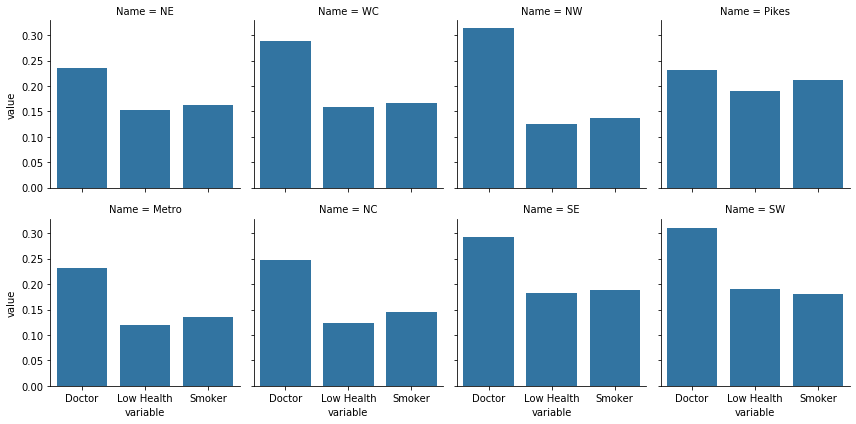

In [17]:
grid = sns.FacetGrid(df_melted,col='Name',col_wrap=4)
grid.map(sns.barplot,'variable','value',order=['Doctor','Low Health','Smoker'],ci=None);

### Question

Why would the error bars be misleading here? Hint: Why do we multiply the Doctor rate by the total population when doing the analysis in Question 3 below?

Answer: _Error bars would be misleading because it can be confusing in terms of what they are actually communicating, namely there are different metrics. 
Besides, in this case, these error bars would only reflect the variation within each region,which aren't representative for the whole population._

## Question 3: Doctor visits

It seems that more people are visiting the doctor in the NW region than in the Metro region. Is the proportion of people having a doctor visit in the previous year significantly different for Metro than for NW? (Note: This is a difference in proportions problem. See Section 6.2 in OIS for more details.)

Assumption: 10,000 households were chosen in Colorado. We will assume these are evenly distributed by regional population. We will also assume that the state officials did a good job and chose people randomly.

- Parameter of interest: difference in proportions $\hat{p_1} - \hat{p_2}$
- H0: The difference is zero. No difference in the groups.
- H1: There is a significant difference
- Significance level 95%, $\alpha$ = 0.05
- $n_1$ = Metro population/Total population * 10,000
- $n_2$ = NW population/Total population * 10,000
- $SE = \sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$
- $\alpha$ = 0.05
- two-tailed test: if the confidence interval for the difference of means excludes 0, then the two means are significantly different.

### Get the total population

D9 on all of the HSR sheets

In [18]:
total_pops = get_entry(wb,'HSR 1', 9, 'D')
total_pops

5555655

### Augment the data frame with population data

Steps:
- Get the Series of populations for each HSR using the `get_entry` method. Use `index=region_sheets` when creating the Series so the index matches our `health` data frame
- Make a data frame with this one series.
- Use `concat` to combine with the `health` data frame. Remember that adding a column is `axis=1`. You'll need to use `sort=True` and set the index name as above.

In [19]:
pop_lst = [get_entry(wb, sheet, 9, 'B')for sheet in region_sheets]
pop = pd.Series(pop_lst, index=region_sheets)

In [20]:
df_pop = pd.DataFrame(pop)
df_pop.columns=['Population']
df_pophealth = pd.concat([df_pop,df_concat], axis=1, sort=False)
df_pophealth

,Population,Name,College Education,Unemployment,Low Health,Doctor,Smoker
HSR 1,72421,NE,0.459277,0.023570,0.221251,0.246145,0.187167
HSR 2,340227,NC,0.692341,0.023138,0.137232,0.252471,0.129507
HSR 3,328478,Metro,0.794693,0.022731,0.073805,0.148866,0.084919
HSR 4,688225,Pikes,0.651583,0.031726,0.137196,0.233632,0.196453
HSR 5,41279,NE,0.625867,0.020836,0.125222,0.187236,0.124721
HSR 6,67400,SE,0.484784,0.033781,0.181648,0.292609,0.188173
HSR 7,164590,Pikes,0.501564,0.042891,0.228348,0.257856,0.170443
HSR 8,46240,SW,0.492404,0.038061,0.260885,0.283036,0.199916
HSR 9,98040,SW,0.613151,0.028425,0.118986,0.339075,0.160791
HSR 10,101765,WC,0.525043,0.035605,0.178830,0.312423,0.139821


### Calculations

- Metro population
- NW population
- n1 = Metro population / Total population * 10,000
- n2 = same for NW

Hint: n2 should be around 400

In [21]:
metro_pops = get_entry(wb,'HSR 3', 9, 'B') + get_entry(wb,'HSR 16', 9, 'B') + get_entry(wb,'HSR 17', 9, 'B') + get_entry(wb,'HSR 20', 9, 'B') + get_entry(wb,'HSR 21', 9, 'B')
metro_pops

2044127

In [22]:
nw_pops = get_entry(wb,'HSR 11', 9, 'B') + get_entry(wb,'HSR 12', 9, 'B')
nw_pops

222745

In [23]:
n1 = metro_pops/ total_pops *10000
n1

3679.3627394069645

In [24]:
n2 = nw_pops / total_pops * 10000
n2

400.93382328456323

In [25]:
print (f'Number of samples for metro {n1}\nNumber of samples for NW {n2}')

Number of samples for metro 3679.3627394069645
Number of samples for NW 400.93382328456323


- Create a `Doctor_Total` column multiplying the `Doctor` column times the `Pop` column. 
- Compute the `Doctor_Total` sum for the `Metro` area and the `NW` area.

Hint: the number of residents visiting a doctor in the previous year in the NW area should be around 70,000

In [28]:
df_pophealth['Doctor_Total'] = df_pophealth['Doctor'] * df_pophealth['Population'] 
df_pophealth

,Population,Name,College Education,Unemployment,Low Health,Doctor,Smoker,Doctor_Total
HSR 1,72421,NE,0.459277,0.023570,0.221251,0.246145,0.187167,17826.054021
HSR 2,340227,NC,0.692341,0.023138,0.137232,0.252471,0.129507,85897.396362
HSR 3,328478,Metro,0.794693,0.022731,0.073805,0.148866,0.084919,48899.211904
HSR 4,688225,Pikes,0.651583,0.031726,0.137196,0.233632,0.196453,160791.318541
HSR 5,41279,NE,0.625867,0.020836,0.125222,0.187236,0.124721,7728.912752
HSR 6,67400,SE,0.484784,0.033781,0.181648,0.292609,0.188173,19721.823238
HSR 7,164590,Pikes,0.501564,0.042891,0.228348,0.257856,0.170443,42440.548174
HSR 8,46240,SW,0.492404,0.038061,0.260885,0.283036,0.199916,13087.585203
HSR 9,98040,SW,0.613151,0.028425,0.118986,0.339075,0.160791,33242.935695
HSR 10,101765,WC,0.525043,0.035605,0.178830,0.312423,0.139821,31793.722958


In [32]:
metro = df_pophealth.loc[['HSR 3', 'HSR 16', 'HSR 17', 'HSR 20', 'HSR 21'], ['Doctor_Total']] 
doc_metro = np.sum(metro)
doc_metro

Doctor_Total    481271.842278
dtype: float64

In [36]:
nw = df_pophealth.loc[['HSR 11', 'HSR 12'],['Doctor_Total']]
doc_nw = np.sum(nw)
doc_nw

Doctor_Total    69934.079377
dtype: float64

### Sample means

- $\hat{p_1}$ Metro doctor visitors / Metro population
- $\hat{p_2}$ NW doctor visitors / NW population

In [37]:
p1_hat = doc_metro / metro_pops

In [38]:
p2_hat = doc_nw / nw_pops

Difference in means $\hat{p_1} - \hat{p_2}$. Should be around -0.079

In [41]:
diff = p1_hat - p2_hat

Doctor_Total   -0.078523
dtype: float64

In [42]:
print(p1_hat)
print(p2_hat)
print(diff)

Doctor_Total    0.235441
dtype: float64
Doctor_Total    0.313965
dtype: float64
Doctor_Total   -0.078523
dtype: float64


### Check assumptions

Are there enough respondents in each condition?

- $n_1 * \hat{p_1}$
- $n_1 * (1 - \hat{p_1})$
- $n_2 * \hat{p_2}$
- $n_2 * (1 - \hat{p_2}$

These should all be greater than 10.

In [43]:
print (n1 * p1_hat)
print (n1 * (1-p1_hat))
print (n2 * p2_hat)
print (n2 * (1 - p2_hat))

Doctor_Total    866.27381
dtype: float64
Doctor_Total    2813.08893
dtype: float64
Doctor_Total    125.87909
dtype: float64
Doctor_Total    275.054734
dtype: float64


### Compute SE

$SE = \sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$

See book Chapter 6.2

In [45]:
se = np.sqrt((p1_hat*(1-p1_hat)/n1)+ (p2_hat*(1-p2_hat)/n2))
se

Doctor_Total    0.02421
dtype: float64

### Compute confidence interval at 95%


This is the difference in means $\pm z^* * se$

For $\alpha = 0.05$, $z^*$ = 1.96



In [46]:
(diff - (1.96 * se), diff + (1.96 * se))

(Doctor_Total   -0.125976
 dtype: float64, Doctor_Total   -0.031071
 dtype: float64)

### Conclusion

 

The confidence interval excludes 0, we reject the null hypothesis, and conclude that there is a significant difference.